<h1>KNN Project - R</h1>
Since KNN is such a simple algorithm, I will use this "Project" as a simple exercise to test my understanding of the implementation of KNN.

<h2>Get the Data</h2>
<h3>Iris Dataset</h3>
I'll use this famous Iris dataset for this project. It's a small dataset with flower features that can be used to attempt to predict the species of an Iris flower.

In [2]:
#Install Modules
install.packages("caTools")
install.packages("class")
install.packages("dplyr")

Installing package into ‘/home/ben/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/ben/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/ben/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



In [3]:
#Load 
library(caTools)
library(class)
library(dplyr)
library(ggplot2)

In [4]:
df <- read.csv("iris.csv")

In [5]:
head(df)

,sepal_length,sepal_width,petal_length,petal_width,species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [6]:
str(df)

'data.frame':	150 obs. of  5 variables:
 $ sepal_length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ sepal_width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ petal_length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ petal_width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ species     : chr  "setosa" "setosa" "setosa" "setosa" ...


<h2>Standardize Data</h2>
In this case, the iris dataset has all its features in the same order of magnitude, but it is good practise (especially with KNN) to standardize features in your data. 

In [7]:
#I'll use scale() to standardise the feature columns of this dataset.
stand.features <- scale(df[1:4])

In [8]:
#Check that the scaling worked by checking the variance of one of the new columns
var(stand.features[,1])

[1] 1

In [9]:
#Join the standardised data with the response/target/label column
final.data <- cbind(stand.features,df[5])

In [10]:
head(final.data, 10)

,sepal_length,sepal_width,petal_length,petal_width,species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,-0.8976739,1.0286113,-1.336794,-1.308593,setosa
2,-1.1392005,-0.1245404,-1.336794,-1.308593,setosa
3,-1.3807271,0.3367203,-1.393470,-1.308593,setosa
4,-1.5014904,0.1060900,-1.280118,-1.308593,setosa
5,-1.0184372,1.2592416,-1.336794,-1.308593,setosa
6,-0.5353840,1.9511326,-1.166767,-1.046525,setosa
7,-1.5014904,0.7979809,-1.336794,-1.177559,setosa
8,-1.0184372,0.7979809,-1.280118,-1.308593,setosa
9,-1.7430170,-0.3551707,-1.336794,-1.308593,setosa


<h2>Train and Test Splits</h2>
I'll use caTools library to split the standardised data into train and test sets using a 70/30 split.

In [11]:
set.seed(101)

sample <- sample.split(final.data$species, SplitRatio = .70)
train <- subset(final.data, sample == TRUE)
test <- subset(final.data, sample == FALSE)

In [12]:
#Uae the knn function to predict species of the test set.
predicted.species <- knn(train[1:4],test[1:4],train$species,k=1)
predicted.species

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] setosa     setosa     setosa     versicolor versicolor versicolor
[19] versicolor versicolor virginica  versicolor versicolor versicolor
[25] versicolor versicolor virginica  versicolor versicolor versicolor
[31] virginica  virginica  virginica  virginica  virginica  virginica 
[37] virginica  virginica  virginica  virginica  virginica  virginica 
[43] virginica  virginica  virginica 
Levels: setosa versicolor virginica

In [13]:
#misclassification rate
mean(test$species != predicted.species)

[1] 0.04444444

<h2>Choosing a K Value</h2>
Although our data is quite small to really get a feel for choosing a good K value, I'll practise.

In [14]:
predicted.species <- NULL
error.rate <- NULL

for(i in 1:10){
    set.seed(101)
    predicted.species <- knn(train[1:4],test[1:4],train$species,k=i)
    error.rate[i] <- mean(test$species != predicted.species)
}

In [15]:
library(ggplot2)
k.values <- 1:10
error.df <- data.frame(error.rate,k.values)

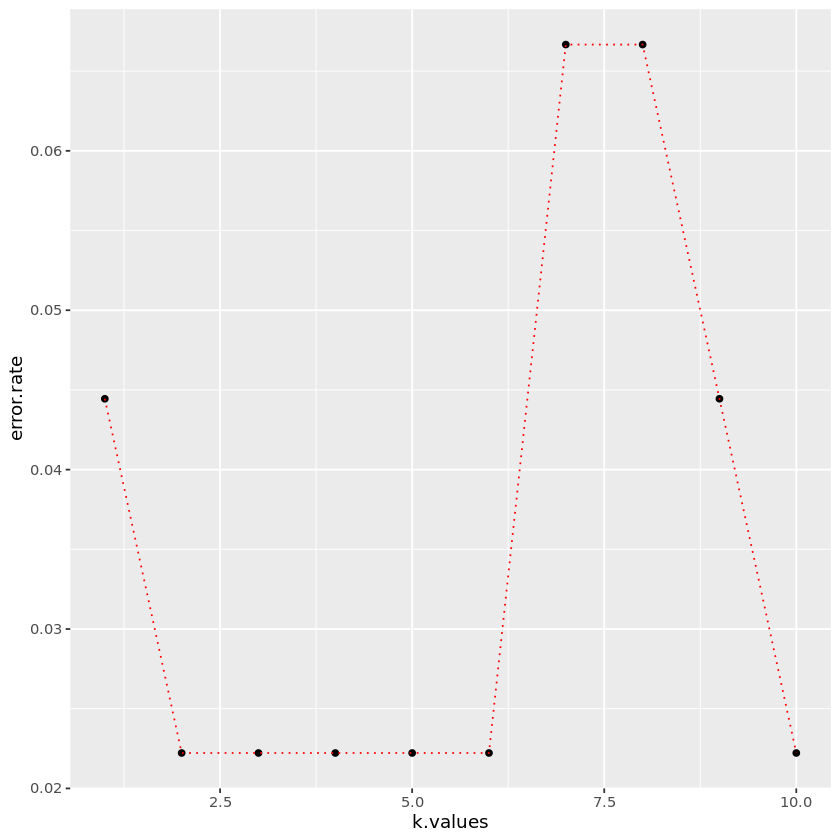

In [16]:
pl <- ggplot(error.df,aes(x=k.values,y=error.rate)) + geom_point()
pl + geom_line(lty="dotted", color='red')

The plot shows that the error rate drops to its lowest value between 2-6 before it jumps up again. This is due to how small the dataset is. At k=10 we reach k=10% which is quite large.

<h2>Try another dataset</h2>
For practise I'll run a similar process but this time with the Titanic Dataset, I'll attempt to predict passengers class using KNN.

In [17]:
df.titanic <- read.csv("Titanic-Dataset.csv")

In [18]:
head(df.titanic)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [19]:
str(df.titanic)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


In [20]:
df.titanic.reordered <- df.titanic %>%
  relocate(Pclass, .after = last_col())

# Print the structure after mutation
head(df.titanic.reordered)

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>
1,1,0,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,3
2,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
3,3,1,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,3
4,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1
5,5,0,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,3
6,6,0,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,3


In [21]:
df_titanic.reordered <- na.omit(df.titanic.reordered)

In [22]:
anyNA(df_titanic.reordered)

[1] FALSE

<h2>Train and Test Splits</h2>
I'll use caTools library to split the standardised data into train and test sets using a 70/30 split.

In [23]:
set.seed(101)
df.titanic.reordered <- subset(df.titanic.reordered, select = -Name)
df.titanic.reordered <- subset(df.titanic.reordered, select = -Sex)
df.titanic.reordered <- subset(df.titanic.reordered, select = -Ticket)
df.titanic.reordered <- subset(df.titanic.reordered, select = -Embarked)
df.titanic.reordered <- subset(df.titanic.reordered, select = -Cabin)
df.titanic.reordered <- na.omit(df.titanic.reordered)

#df.titanic.new <- df.titanic.new %>% mutate(PclassNew = NA)
# Split the data (use 0.7 for 70% training data)
sample <- sample.split(df.titanic.reordered$Pclass, SplitRatio = 0.7)
#sum(sample)
train <- subset(df.titanic.reordered, sample == TRUE)
test <- subset(df.titanic.reordered, sample == FALSE)

In [24]:
str(df.titanic.reordered)

'data.frame':	714 obs. of  7 variables:
 $ PassengerId: int  1 2 3 4 5 7 8 9 10 11 ...
 $ Survived   : int  0 1 1 1 0 0 0 1 1 1 ...
 $ Age        : num  22 38 26 35 35 54 2 27 14 4 ...
 $ SibSp      : int  1 1 0 1 0 0 3 0 1 1 ...
 $ Parch      : int  0 0 0 0 0 0 1 2 0 1 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Pclass     : int  3 1 3 1 3 1 3 3 2 3 ...
 - attr(*, "na.action")= 'omit' Named int [1:177] 6 18 20 27 29 30 32 33 37 43 ...
  ..- attr(*, "names")= chr [1:177] "6" "18" "20" "27" ...


In [25]:
train <- na.omit(train)
test <- na.omit(test)
anyNA(train)
anyNA(test)

[1] FALSE

[1] FALSE

In [26]:
predicted.class.new <- knn(train[0:7],test[0:7],train$Pclass,k=1)
predicted.class.new

[1] 1 3 2 3 3 1 1 2 3 3 3 2 2 1 2 2 3 3 3 2 1 3 3 3 3 3 1 3 1 3 3 3 2 2 1 2 2
 [38] 2 3 2 2 3 3 3 3 3 2 2 1 3 2 3 3 3 3 3 1 2 2 2 2 3 3 3 1 3 2 2 3 3 1 3 3 1
 [75] 1 3 1 2 1 1 1 2 1 2 1 2 1 2 3 3 1 1 3 1 1 3 1 1 3 1 3 2 3 3 3 2 2 2 2 2 2
[112] 1 2 2 1 2 3 1 2 1 2 1 1 2 3 3 1 2 3 2 1 2 2 1 3 3 1 1 3 3 1 2 3 1 3 3 1 1
[149] 3 3 3 1 3 1 3 3 3 3 3 3 3 1 2 3 1 3 3 3 3 3 3 1 1 3 3 3 3 3 1 2 3 3 3 1 3
[186] 3 3 1 2 3 3 3 3 2 3 2 1 3 3 3 2 3 2 3 3 3 3 3 1 2 2 3 3 3 1
Levels: 1 2 3

<h2>Choosing the correct K Value</h2>
Again I will run a plot to choose the correct K value then re-run the model.

In [27]:
predicted.class <- NULL
error.rate <- NULL

for(i in 1:12){
    set.seed(101)
    predicted.class <- knn(train[0:7],test[0:7],train$Pclass,k=i)
    error.rate[i] <- mean(test$Pclass != predicted.class)
}

In [28]:
k.values <- 1:12
error.df <- data.frame(error.rate,k.values)

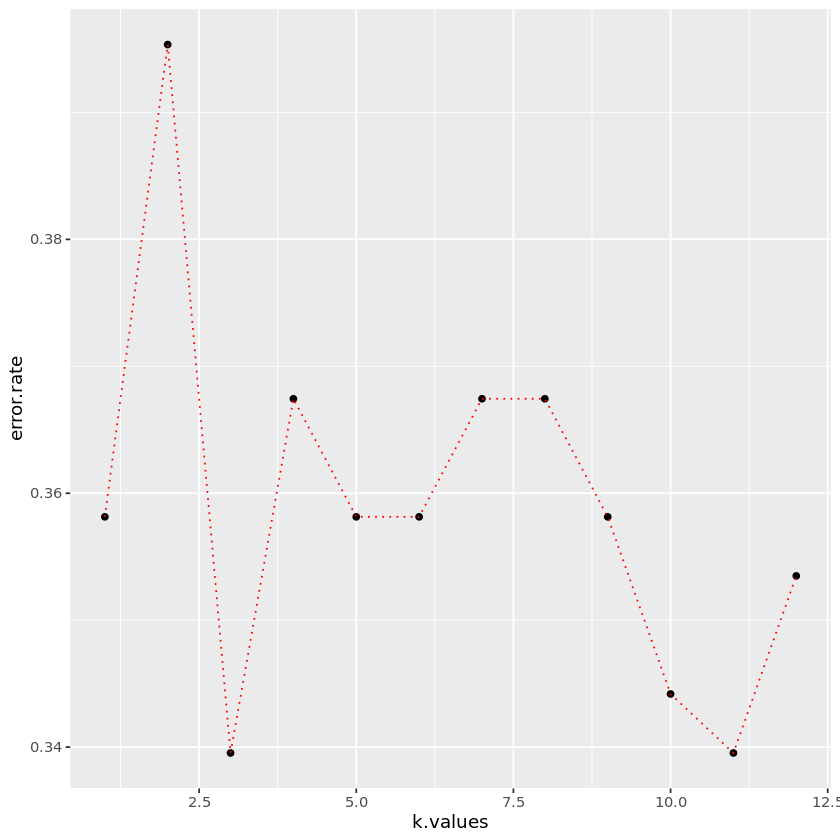

In [29]:
pl <- ggplot(error.df,aes(x=k.values,y=error.rate)) + geom_point()
pl + geom_line(lty="dotted", color='red')

Looking at the plit, the best k value are approximately 3.

In [30]:
#Re-run the model with a k of 3
predicted.class <- knn(train[0:7],test[0:7],train$Pclass,k=3)
predicted.class

[1] 1 3 2 3 3 1 1 3 3 3 3 3 3 1 2 3 3 3 3 3 1 3 3 3 3 3 1 3 1 3 3 3 3 2 1 3 2
 [38] 3 2 2 2 2 3 3 3 3 3 3 1 3 3 3 3 3 3 2 1 2 2 3 2 3 3 3 1 3 2 2 3 3 1 3 3 1
 [75] 1 3 1 3 1 1 1 2 1 2 1 2 3 2 3 3 1 1 3 1 1 3 1 2 3 1 3 2 3 3 3 2 2 3 3 2 2
[112] 2 2 2 1 2 3 1 1 2 1 2 1 2 3 3 1 2 3 2 1 2 3 1 3 3 1 1 2 3 1 2 3 1 3 3 3 1
[149] 3 3 3 1 3 3 3 3 3 3 1 3 3 1 2 3 1 3 3 3 2 3 3 1 1 3 3 3 3 3 1 3 3 3 3 1 3
[186] 3 3 1 3 3 3 3 3 2 3 3 1 3 3 3 2 3 3 3 3 3 1 3 3 1 2 3 3 3 1
Levels: 1 2 3

<h2>Analyse the results</h2>

In [31]:
confusion_matrix <- table(predicted.class, test$Pclass)
confusion_df <- as.data.frame(as.table(confusion_matrix))
colnames(confusion_df) <- c("Predicted", "Actual", "Count")

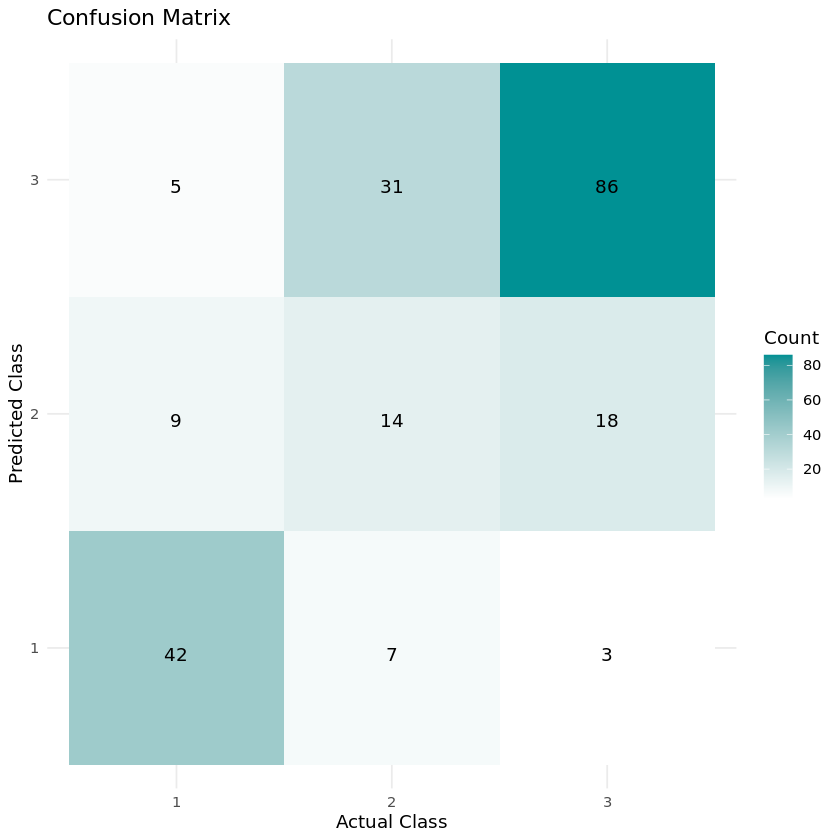

In [32]:
# Create the plot
ggplot(data = confusion_df, aes(x = Actual, y = Predicted, fill = Count)) +
  geom_tile() +
  geom_text(aes(label = Count), vjust = 1) +
  scale_fill_gradient(low = "white", high = "#009194") +  # Corrected 'low' argument
  labs(x = "Actual Class", y = "Predicted Class") +
  ggtitle("Confusion Matrix") +
  theme_minimal()

In the confusion matrix above, the darker the colour the high the frequency.